## TP2 &ndash; Fonctions génératrices

Indiquez vos noms ici:

- A
- B
- C

On peut travailler dans Sage avec des séries de puissances aussi aisément qu'avec des polynômes; il suffit de déclarer notre envie de le faire.

In [3]:
R.<x> = PowerSeriesRing(QQ)  # anneau des séries entières à coefficients rationnels

Dans les faits, on ne travaille jamais avec tous les termes d'une série mais plutôt avec sa troncature à un ordre donné (20 par défaut):

In [4]:
1/(1+x)

1 - x + x^2 - x^3 + x^4 - x^5 + x^6 - x^7 + x^8 - x^9 + x^10 - x^11 + x^12 - x^13 + x^14 - x^15 + x^16 - x^17 + x^18 - x^19 + O(x^20)

mais on peut changer celui-ci à la baisse si on le souhaite:

In [5]:
1/(1+x) + O(x^5)

1 - x + x^2 - x^3 + x^4 + O(x^5)

ou encore à la hausse (mais pour cela il faut augmenter la précision au niveau de l'anneau).

In [6]:
1/(1+x) + O(x^30)  # ne fait pas ce qu'on pourrait croire

1 - x + x^2 - x^3 + x^4 - x^5 + x^6 - x^7 + x^8 - x^9 + x^10 - x^11 + x^12 - x^13 + x^14 - x^15 + x^16 - x^17 + x^18 - x^19 + O(x^20)

In [7]:
R.set_default_prec(30)

In [8]:
1/(1+x)  # ok

1 - x + x^2 - x^3 + x^4 - x^5 + x^6 - x^7 + x^8 - x^9 + x^10 - x^11 + x^12 - x^13 + x^14 - x^15 + x^16 - x^17 + x^18 - x^19 + x^20 - x^21 + x^22 - x^23 + x^24 - x^25 + x^26 - x^27 + x^28 - x^29 + O(x^30)

On peut effectuer toutes les opérations arithmétiques de base sur ces séries; et on peut passer d'une liste de coefficient à une série et vice-versa de la façon suivante.

In [9]:
f = R([1,2,3,4,5]); f

1 + 2*x + 3*x^2 + 4*x^3 + 5*x^4

In [10]:
f.prec()

+Infinity

Notez que la série considérée à l'instant n'est __pas__ tout à fait la transformée en $z$ de la suite $(1,2,3,4,5,0,0,\ldots)$: pour cela il faudrait plutôt poser $x = 1/z$ et utiliser $z$ comme variable.

Étant donné une suite $(a_n)_{n\in\mathbf{N}}$, on appelle $\displaystyle f(x) = \sum_{n=0}^\infty a_n x^n$ la __fonction génératrice__ de la suite (sans trop se soucier ici des questions de convergence). Sa transformée en $z$ est $f(z^{-1})$ qui a de bonnes propriétés théoriques; pour le calcul numérique (comme ici) il est souvent plus simple de travailler directement avec $f(x)$.

Voici par exemple la fonction génératrice d'une suite célèbre:

In [11]:
R.<x> = PowerSeriesRing(QQ)

F = 1/(1 - x - x^2)  # z^2/(z^2 - z - 1)

F

1 + x + 2*x^2 + 3*x^3 + 5*x^4 + 8*x^5 + 13*x^6 + 21*x^7 + 34*x^8 + 55*x^9 + 89*x^10 + 144*x^11 + 233*x^12 + 377*x^13 + 610*x^14 + 987*x^15 + 1597*x^16 + 2584*x^17 + 4181*x^18 + 6765*x^19 + 10946*x^20 + 17711*x^21 + 28657*x^22 + 46368*x^23 + 75025*x^24 + 121393*x^25 + 196418*x^26 + 317811*x^27 + 514229*x^28 + 832040*x^29 + O(x^30)

## A) Partages

À la maison j'ai 42 biscuits et deux garçons: le grand les mange 3 par 3 et le petit 2 par 2. De combien de façons cela peut-on répartir les 42 biscuits en tas de 2 ou de 3 ?

Si on formalise la question, il s'agit de compter le nombre de façons d'écrire $42 = 2 a + 3 b$, soit $x^{42} = (x^2)^a (x^3)^b$. Il s'agit donc du coefficient de $x^{42}$ dans l'expression

$$ (1 + x^2 + x^4 + x^6 + \cdots)(1 + x^3 + x^6 + x^9 + \cdots) = \sum_{a = 0}^\infty (x^2)^a \cdot \sum_{b = 0}^\infty (x^3)^b = \frac{1}{1 - x^2} \cdot \frac{1}{1 - x^3}. $$

In [12]:
R.set_default_prec(50)

( 1/(1-x^2) * 1/(1-x^3) ).padded_list()[42]

8

Il y a donc 8 façons de répartir les biscuits en tas de 2 ou 3; vérifions:

In [13]:
for a in range(22):
    if (42 - 2*a) % 3 == 0:
        b = (42 - 2*a) / 3
        print (a,b)

0 14
3 12
6 10
9 8
12 6
15 4
18 2
21 0


Ce qui est bien c'est que cette méthode se généralise aisément: le nombre de façons de répartir $n$ objets en $k$ tas par paquets de tailles respectives $m_1, \ldots, m_k$ est le coefficient de $x^n$ dans la fonction génératrice

$$ \prod_{i = 1}^k \frac{1}{1 - x^{m_i}}. $$

En d'autres termes: le coefficient de $x^n$ dans cette expression est le nombre de $k$-uplets $(a_1, \ldots, a_k)$ pour lesquels $\sum_{i=1}^k m_i a_i = n$.

__Question 1__. En utilisant cette méthode, déterminer le nombres de façons de répartir $10$ biscuits entre $2$ enfants:

a) si on suppose qu'on les distribue tous;

b) si on se permet d'en manger quelques-uns.

Les réponses vous semblent-elles cohérentes ?

In [20]:
def distrib(k,m,n,f):
    
    som=1
    R.set_default_prec(n+1-f)
    
    for a in range(0,k):
        
        for i in range(0,len(m)):
            
            som=som*(1/(1-(x^m[i])))
       
    
    return som.padded_list()[n-f]

# a)
print("a)", distrib(2,[1],10,0))

# b)
print("b)", distrib(2,[1],10,5))

# c)

print("Les réponses semblent cohérentes étant donné que plus on en mange, moins il en reste à distribuer")

a) 11
b) 6
Les réponses semblent cohérentes étant donné que plus on en mange, moins il en reste à distribuer


__Question 2__. De combien de façons peut-on rendre 1,47 € en monnaie ?

In [24]:
print("On peut utiliser des pièces de 1, 2, 5, 10, 20 et 50 centimes ainsi que 1 pièce de 1euro, donc de 100 centimes, d'où")
print("nombre de façons de rendre 1.47€ en monnaie=", distrib(1,[1,2,5,10,20,50,100],147,0))

On peut utiliser des pièces de 1, 2, 5, 10, 20 et 50 centimes ainsi que 1 pièce de 1euro, donc de 100 centimes, d'où
nombre de façons de rendre 1.47€ en monnaie= 20116


__Question 3__. De combien de façons peut-on écrire $20$ comme la somme d'entiers positifs ? Distinguer selon que l'on tienne compte de l'ordre des termes ou pas.

In [32]:
nb=[]
for i in range (1,21):
    nb.append(i)
    
print("Non Ordonné:",distrib(1,nb,20,0))



Non Ordonné: 627


## B) Parenthésages balancés

On appelle _mot de Dyck_ toute chaîne de caractères ne comportant que des ( et des ) et représentant une expression bien balancée (toute parenthèse ouvrante finira par se refermer un peu plus loin; et on ne peut pas refermer une paire de parenthèses avant de l'avoir ouverte).

__Question 1__. Écrire une fonction récursive __dyck($n$)__ renvoyant la liste de tous les mots de Dyck de longueur $2n$ (donc comportant $n$ paires de parenthèses). Donner la liste des 42 mots de Dyck de longueur 10.

In [1]:
def dyck(n):
    
    liste = []
    
    if n == 0:
        
        liste.append("")
        
    else:
        
        for i in range(n):
            
            for j in dyck(i):
                
                for k in dyck(n - i - 1):
                    
                    liste.append('(' + j + ')' + k)
    return liste

print(dyck(3))

['()()()', '()(())', '(())()', '(()())', '((()))']


__Question 2__. La longueur $C_n$ de la liste renvoyée par __dyck($n$)__ satisfait l'équation de récurrence

$$ C_{n+1} = \sum_{k=0}^n C_k C_{n-k}. $$

Utiliser celle-ci pour obtenir les valeurs de $C_n$ pour $n \in [\![ 0, 100 ] \! ]$ afin d'observer graphiquement l'allure des premiers termes de la suite.

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786, 208012, 742900, 2674440, 9694845, 35357670, 129644790, 477638700, 1767263190, 6564120420, 24466267020, 91482563640, 343059613650, 1289904147324, 4861946401452, 18367353072152, 69533550916004, 263747951750360, 1002242216651368, 3814986502092304, 14544636039226909, 55534064877048198, 212336130412243110, 812944042149730764, 3116285494907301262, 11959798385860453492, 45950804324621742364, 176733862787006701400, 680425371729975800390, 2622127042276492108820, 10113918591637898134020, 39044429911904443959240, 150853479205085351660700, 583300119592996693088040, 2257117854077248073253720, 8740328711533173390046320, 33868773757191046886429490, 131327898242169365477991900, 509552245179617138054608572, 1978261657756160653623774456, 7684785670514316385230816156, 29869166945772625950142417512, 116157871455782434250553845880, 451959718027953471447609509424, 1759414616608818870992479875972, 6852456927844873497549658464312, 2670095285677485190424

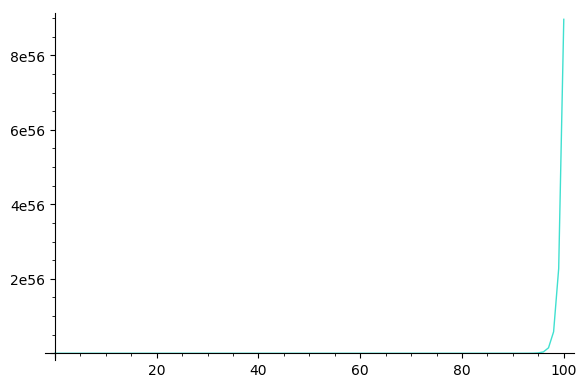

In [18]:
def dyck2(nmax):
    
    liste2 = []
    
    for n in range(0, nmax+1):
        
        longueur(n, liste2)
        
    return liste2


def longueur(n, liste2):
    
    if n <= 1:
            
        S = 1
        
    else:
        
        S = 0
        
        for k in range(n):
            
            S += liste2[k] * liste2[n-k-1]
            
    liste2.append(S)
    
    return S

print(dyck2(100))
list_plot(dyck2(100), plotjoined=true, color = "turquoise")


__Question 3__. Confirmer vos valeurs trouvées à la question précédente avec les 101 premiers coefficients de la fonction génératrice

$$ C(x) = \sum_{n=0}^\infty C_n x^n = \frac{1 - \sqrt{1 - 4x}}{2x}. $$

In [10]:
R.<x> = PowerSeriesRing(QQ)
R.set_default_prec(102)
print(((1 - sqrt(1 - 4 * x)) / (2 * x)).padded_list())

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786, 208012, 742900, 2674440, 9694845, 35357670, 129644790, 477638700, 1767263190, 6564120420, 24466267020, 91482563640, 343059613650, 1289904147324, 4861946401452, 18367353072152, 69533550916004, 263747951750360, 1002242216651368, 3814986502092304, 14544636039226909, 55534064877048198, 212336130412243110, 812944042149730764, 3116285494907301262, 11959798385860453492, 45950804324621742364, 176733862787006701400, 680425371729975800390, 2622127042276492108820, 10113918591637898134020, 39044429911904443959240, 150853479205085351660700, 583300119592996693088040, 2257117854077248073253720, 8740328711533173390046320, 33868773757191046886429490, 131327898242169365477991900, 509552245179617138054608572, 1978261657756160653623774456, 7684785670514316385230816156, 29869166945772625950142417512, 116157871455782434250553845880, 451959718027953471447609509424, 1759414616608818870992479875972, 6852456927844873497549658464312, 2670095285677485190424